In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import zipfile
import matplotlib.pyplot as plt
import pathlib
import PIL
import PIL.Image
import numpy as np
import os
from pathlib import Path



TensorFlow version: 2.8.2


In [2]:
import tensorflow as tf
my_url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=my_url, extract=True)






824901632/824887076 [==============================] - 9s 0us/step


In [3]:
zip_dir

'/root/.keras/datasets/cats_and_dogs.zip'

In [4]:
%%capture
!unzip /root/.keras/datasets/cats_and_dogs.zip;

In [8]:


import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
path = Path('PetImages/Cat').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

PetImages/Cat/666.jpg


In [9]:
os.remove("PetImages/Cat/666.jpg")

In [10]:
path = Path('PetImages/Dog').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

PetImages/Dog/11702.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [11]:
os.remove("PetImages/Dog/11702.jpg")

In [14]:
train_dir = pathlib.Path("/content/PetImages")
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

24998


In [26]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=4444,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=4444,
    image_size=image_size,
    batch_size=batch_size,
)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [27]:
def load(f, label):
    image = tf.io.read_file(f)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    
    return image, label

# New Section

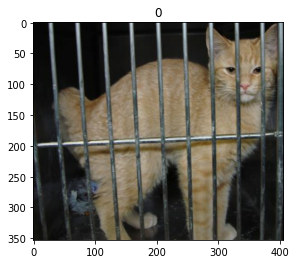

In [28]:
image, label = load('/content/PetImages/Cat/15.jpg', 0)

fig, ax = plt.subplots()
ax.imshow(image /255.)
ax.set_title(label)
plt.show()

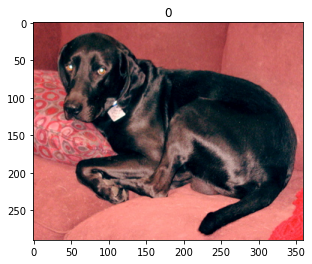

In [29]:
image, label = load('/content/PetImages/Dog/1098.jpg', 0)

fig, ax = plt.subplots()
ax.imshow(image /255.)
ax.set_title(label)
plt.show()

In [30]:
data_dir = pathlib.Path("/content/PetImages")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

cats_dir = pathlib.Path("/content/PetImages/Cat")
cat_image_count = len(list(data_dir.glob('Cat/*.jpg')))
print(cat_image_count)

dogs_dir = pathlib.Path("/content/PetImages/Dog")
dog_image_count = len(list(data_dir.glob('Dog/*.jpg')))
print(dog_image_count)

24998
12499
12499


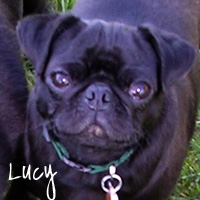

In [31]:
#bakmanın başka bir yolu
dogs = list(data_dir.glob('Dog/*'))
PIL.Image.open(str(dogs[0]))

In [32]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.3),
])

In [33]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

In [35]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [37]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [38]:
#RGB channel normalization
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.785695


In [40]:
def load_image_train(image_file, label):
    image, label = load(image_file, label)
    image = tf.image.resize(image, [160,160])
    return image, label

def load_image_val(image_file, label):
    image, label = load(image_file, label)
    image = tf.image.resize(image, [160,160])
    return image, label

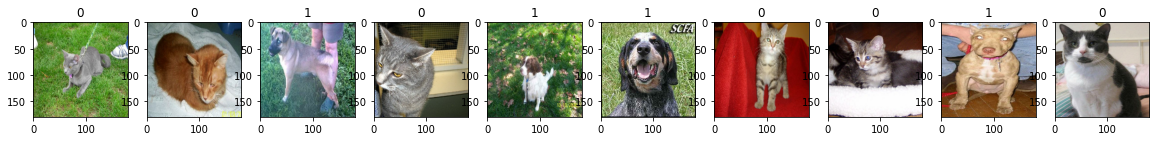

In [43]:
for images, labels in train_ds.take(1):
    fig, ax = plt.subplots(1, 10, figsize=(20, 6))
    for j in range(10):
        image = images[j].numpy()
        image = image / np.amax(image)
        image = np.clip(image, 0, 1)
        ax[j].imshow(image)
        ax[j].set_title(labels[j].numpy())
plt.show()

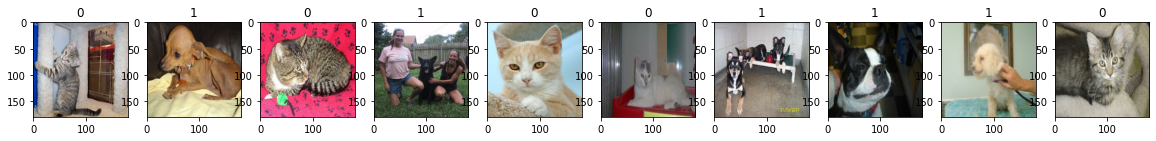

In [44]:
for images, labels in val_ds.take(1):
    fig, ax = plt.subplots(1, 10, figsize=(20, 6))
    for j in range(10):
        image = images[j].numpy()
        image = image / np.amax(image)
        image = np.clip(image, 0, 1)
        ax[j].imshow(image)
        ax[j].set_title(labels[j].numpy())
plt.show()

In [45]:
AUTOTUNE = tf.data.AUTOTUNE
train = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [46]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [47]:
image_shape = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')


9420800/9406464 [==============================] - 0s 0us/step


In [48]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [49]:
base_model.trainable = False

In [50]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [51]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [52]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [57]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = normalization_layer(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [58]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 rescaling (Rescaling)       multiple                  0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0   

In [61]:
initial_epochs = 10

loss, accuracy = model.evaluate(val_ds)


 10/126 [=>............................] - ETA: 1:23 - loss: 0.7868 - accuracy: 0.5906

InvalidArgumentError: ignored